<a href="https://colab.research.google.com/github/nalinis07/APT_Proj_Ref_copy/blob/MASTER/AT_Lesson_72_Project_Solution_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Deploying A Prediction Model
 2. Model Evaluation
 3. Logistic Regression - Univariate I



---

### Problem Statement

Nowadays, social media advertising is one of the popular forms of  advertising. Advertisers can utilise user's demographic information and target their ads accordingly.

Implement Random Forest Classification and Logistic Regression to determine whether a user will purchase a particular product displayed on a social network ad or not.  Compare the accuracy of both the classification algorithms.


---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Train-Test Split

**Activity 3:** Random Forest Classification - Model Training

**Activity 4:** Random Forest Classification - Model Prediction and Evaluation

**Activity 5:** Logistic Regression - Model Training

**Activity 6:** Logistic Regression - Model Prediction and Evaluation

**Activity 7:** Comparision and Conclusion








---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Social Network** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|UserID|Unique ID|
|Gender|Male or Female|
|Age|Age of a person|
|EstimatedSalary|Salary of a person|
|Purchased|‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.|


  **Source:** https://www.kaggle.com/rishabhsingh98/social-network-ads
  
  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/social-network-ads.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly (if any).

- Create a heatmap to identify the relationship between the independent attributes and dependent attribute `Purchased`.




In [ ]:
# Import modules
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/social-network-ads.csv')

# Print the first five rows of the dataframe
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Q:** Are there any missing values?

**A:** No

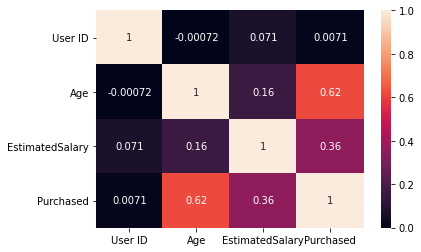

In [ ]:
# Create a heatmap to identify the relation between attributes
sns.heatmap(df.corr(),annot=True)
plt.show()

**Q:** Which attribute(s) has the strongest relationship with the `Purchased` feature?

**A:** Age

---


#### Activity 2: Train-Test Split

We have to determine the effect of `Age` on purchase of the products. Thus, `Age` is the feature variable and `Purchased` is the target variable.

- Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

- Reshape the feature and the target variable arrays into two-dimensional arrays by using `reshape(-1, 1)` function of `numpy` module.


In [ ]:
# Split the DataFrame into the train and test sets.

from sklearn.model_selection import train_test_split

X = df['Age']
y = df['Purchased']

# Split the DataFrame into the train and test sets such that test set has 30% of the values.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Reshape to 2-dimensional array.
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280, 1) (120, 1)


----

#### Activity 3: Random Forest Classification - Model Training

Implement Random Forest Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `RandomForestClassifier` class and create an object of this class.
2. Call the `fit()` function using the Random Forest Classifier object and print score using `score()` function using the object created.


In [ ]:
# Import the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_jobs = -1, n_estimators = 100)

rf_clf.fit(X_train, y_train)

rf_clf.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.825

-----

#### Activity 4: Random Forest Classification - Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the Random Forest Classifier object.

Also, compute confusion matrix and classification report values to evaluate the accuracy of your model.

In [ ]:
# Make predictions on the test dataset by using the 'predict()' function.
rf_y_pred = rf_clf.predict(X_test)
rf_y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
# Check the count of records classified under each label
pd_new=pd.Series(rf_y_pred)
pd_new.value_counts()

0    78
1    42
dtype: int64

In [ ]:
# Display the results of 'confusion_matrix'
confusion_matrix(y_test, rf_y_pred)

array([[65,  8],
       [13, 34]])

In [ ]:
# Display the precision, recall and f1-score values.
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        73
           1       0.81      0.72      0.76        47

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.82      0.82       120



**Q** Write the count of f1-score of both labels?

**A:** 1. Label `0`  : 0.86
2. Label `1`  : 0.75

----

#### Activity 5: Logistic Regression - Model Training

Implement Logistic Regression Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `LogisticRegression` class and create an object of this class.
2. Call the `fit()` function on the Logistic Regression object and print score using `score()` function using the object created.


In [ ]:
# Deploy the 'LogisticRegression' model using the 'fit()' function.

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs = -1)

log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8214285714285714

----

#### Activity 6: Logistic Regression - Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the Logistic Regression object.

Also, compute the confusion matrix and classification report values to evaluate the accuracy of your model.

In [ ]:
# Make predictions on the test dataset by using the 'predict()' function.
log_y_pred = log_reg.predict(X_test)
log_y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# Display the results of confusion_matrix
confusion_matrix(y_test, log_y_pred)

array([[70,  3],
       [12, 35]])

In [ ]:
# Display the results of classification_report
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        73
           1       0.92      0.74      0.82        47

    accuracy                           0.88       120
   macro avg       0.89      0.85      0.86       120
weighted avg       0.88      0.88      0.87       120



**Q** Write the count of f1-score of both labels?

**A:** 1. Label `0`  : 0.90
2. Label `1`  : 0.82

-----

#### Activity 7: Comparision and Conclusion

Test both the models to predict labels using same random values of `Age` attribute.

In [ ]:
# Predict labels with same random values from dataset

# Using Random Forest Classifier
print("Random Forest Classification")
print("----------------------------")
print(f"Prediction of Random Forest Classification with age = 18: {rf_clf.predict(np.array(18).reshape(-1, 1))}")
print(f"Prediction of Random Forest Classification with age = 60: {rf_clf.predict(np.array(47).reshape(-1, 1))}\n")

# Using Logistic Regression
print("Logistic Regression Classification")
print("----------------------------------")
print(f"Prediction of Logistic Regression Classification with age = 18: {log_reg.predict(np.array(18).reshape(-1, 1))}")
print(f"Prediction of Logistic Regression Classification with age = 60: {log_reg.predict(np.array(47).reshape(-1, 1))}")

Random Forest Classification
----------------------------
Prediction of Random Forest Classification with age = 18: [0]
Prediction of Random Forest Classification with age = 60: [1]

Logistic Regression Classification
----------------------------------
Prediction of Logistic Regression Classification with age = 18: [0]
Prediction of Logistic Regression Classification with age = 60: [1]


**Q** Which model is better and why?

**A:** Both the models are good because both have f1-score > 0.75 and prediction results are also similar but based on f1-score Logistic Regression is a slightly better model.

------